<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/%5B8%5D%EC%82%AC%EC%A3%BC_%EC%A7%81%EC%97%85%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 태어난 월, 일, 시로 직업을 예측하여 보자

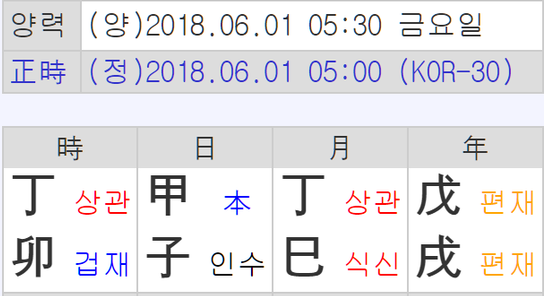

# 연습 데이터 불러오기

연습 데이터는 가상적으로 만들어낸 것이다.

In [0]:

## 필요한 라이브러리 불러오기
import pandas as pd; import numpy as np; from keras.models import Sequential; from keras.layers import Dense, Dropout, Activation; import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split; from keras.utils.np_utils import to_categorical;  from matplotlib import style

## 1. 데이터 불러오기  
!git clone https://github.com/hongjai-rhee/public.git
## 깃허브 디렉토리 마운트
dat = pd.read_csv('/content/public/sajoo.csv')
print(dat.head())



Using TensorFlow backend.


Cloning into 'public'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 266 (delta 39), reused 39 (delta 16), pack-reused 178
Receiving objects: 100% (266/266), 8.88 MiB | 31.47 MiB/s, done.
Resolving deltas: 100% (117/117), done.
   month  day  time  job
0     12   11    13    5
1     11   11    18    6
2      8   19     5    3
3      2   31    21    8
4     11   17     9    4


In [0]:

dat = np.array(dat); ncol=dat.shape[1]; nrow=dat.shape[0]
x=dat[:,0:ncol-1]; y=dat[:,ncol-1]-1  #0=의사, 1=교육, 2=정치, 3=공무원, 4=사업, 5=회사원, 6=연예인, 7=운동선수, 8=무직, 9=기타
y = to_categorical(y)

## 1. 데이터 살펴보기  
print("생년 생월 생시")
print(np.around(x[0:10,:],2))      # 고객특성(나이, 성별, 헤비유저), 3개 브랜드의 (가격, 광고, 스페셜 디스플레이 여부)
print("직업 원핫 코드")
print(y[0:10])                     # 선택된 브랜드  
class_names = ['의사', '교육자', '정치가', '공무원', '사업가', '회사원', '연예인', '운동선수', '무직', '기타']    ## 브랜드 이름


생년 생월 생시
[[12 11 13]
 [11 11 18]
 [ 8 19  5]
 [ 2 31 21]
 [11 17  9]
 [ 5 30 13]
 [ 5 21 21]
 [ 8 28 10]
 [12 26  9]
 [10  3 12]]
직업 원핫 코드
[[0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# 학습 파라미터 설정

In [0]:
hidden_neuron=10      ## 은닉층(1개)의 뉴론 수 (은닉층 없으면 0으로 설정)
EPOCH=300; BATCH=32  ## 학습횟수 
test = 0.2           ## 데이터 중 테스트셋의 비율 


# 학습 시작






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 800 samples, validate on 200 samples
Epoch 1/300





 - 1s - loss: 7.0465 - acc: 0.1775 - val_loss: 6.7517 - val_acc: 0.2000
Epoch 2/300
 - 0s - loss: 5.6321 - acc: 0.2025 - val_loss: 5.5136 - val_acc: 0.1800
Epoch 3/300
 - 0s - loss: 4.3872 - acc: 0.2125 - val_loss: 4.2580 - val_acc: 0.2000
Epoch 4/300
 - 0s - loss: 3.5401 - acc: 0.2012 - val_loss: 3.5850 - val_acc: 0.2000
Epoch 5/300
 - 0s - loss: 3.1367 - acc: 0.2062 - val_loss: 3.1948 - val_acc: 0.2350
Epoch 6/300
 - 0s - loss: 2.8391 - acc: 0.2088 - val_loss: 2.8630 - val_acc: 0.2200
Epoch 7/300
 - 0s - loss: 2.5710 - acc: 0.2375 - val_loss: 2.6020 - val_acc: 0.2100
Epoch 8/300
 - 0s - loss: 2.3497 - acc: 0.2337 - val_loss: 2.3700 - val_acc: 0.2250
Epoch 9/300
 - 0s - loss: 2.1704 - acc: 0.2512 - val_loss: 2.1890 - val_acc: 0.2350
Epoch 10/300
 - 0s - loss: 2.0318 - acc: 0.2562 - val_loss: 2.0517 - val_acc: 0.2400
Epoch 

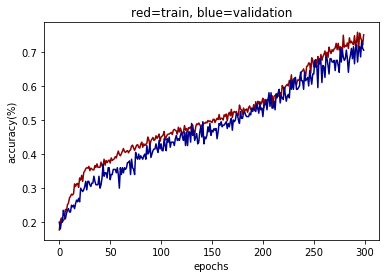

In [0]:
#### 이 아래는 자동으로 실행됨
## 2. 학습/검증 데이터 나누기  (80-20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test, random_state=77)

## 3. 모델만들기
if hidden_neuron ==0: 
    model = Sequential()
    model.add(Dense(y_train.shape[1], input_dim=x_train.shape[1], activation='softmax'))## 은닉층=0
else: 
    model = Sequential()
    model.add(Dense(hidden_neuron, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax')) ## 은닉층=1

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs = EPOCH, batch_size=BATCH, validation_data=(x_test, y_test), verbose = 2)
model.summary()

# model fit 그림으로 표시
plt.plot(range(EPOCH), hist.history['acc'], label='Accuracy', color='darkred')
plt.plot(range(EPOCH), hist.history['val_acc'], label='Validation Accuracy', color='darkblue')
plt.xlabel('epochs'); plt.ylabel('accuracy(%)'); plt.title('red=train, blue=validation'); plt.show()


# 학습된 모형을 사용하여 직업을 예측해보자.

In [0]:
## 컬러 코드
class color:
   PURPLE = '\033[95m';CYAN = '\033[96m'; DARKCYAN = '\033[36m'; BLUE = '\033[94m';GREEN = '\033[92m'; YELLOW = '\033[93m'; RED = '\033[91m'; BOLD = '\033[1m'; UNDERLINE = '\033[4m'; END = '\033[0m'
#print(color.RED + 'Hello World !' + color.END)

In [0]:
x_new= x_test; x_new; yhat = model.predict(x_new)
y_pred=np.argmax(yhat,axis=1)
print("년 월 시")

for i in range(6):
    print(x_test[i])
    print("=======> 이 사람의 직업은", np.round(100*yhat[i,y_pred[i]],2), "%의 확률로", color.RED + class_names[y_pred[i]] + color.END, "이 될 것으로 예측됩니다")
    print()

년 월 시
[7 1 8]
=======> 이 사람의 직업은 66.5 %의 확률로 교육자 이 될 것으로 예측됩니다

[11  1  0]
=======> 이 사람의 직업은 96.49 %의 확률로 의사 이 될 것으로 예측됩니다

[7 2 4]
=======> 이 사람의 직업은 69.73 %의 확률로 교육자 이 될 것으로 예측됩니다

[ 9 10 22]
=======> 이 사람의 직업은 46.47 %의 확률로 연예인 이 될 것으로 예측됩니다

[ 5 13 13]
=======> 이 사람의 직업은 36.06 %의 확률로 공무원 이 될 것으로 예측됩니다

[ 6  4 20]
=======> 이 사람의 직업은 49.88 %의 확률로 회사원 이 될 것으로 예측됩니다

